In [1]:
from IPython import display
from ipywidgets import HBox, VBox, Label, Layout
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

from jupyter_color_picker import ColorPicker

In [2]:
# Create two color picker widgets.
color_picker_1 = ColorPicker()
color_picker_2 = ColorPicker()

# Helper function for adding margins to HBox or VBox.
margins = lambda x, y: Layout(margin=f'{x}px {y}px')

# Display the color pickers.
VBox([HBox([Label('color_1', layout=margins(0, 10)), color_picker_1], layout=margins(10, 20)),
      HBox([Label('color_2', layout=margins(0, 10)), color_picker_2], layout=margins(10, 20))])

In [3]:
# ColorPicker.value gives read/write access to the color. Writing this value from a cell will
# change the color picker display.
color_1 = color_picker_1.value
color_2 = color_picker_2.value

# Print the selected colors.
print('color_1 = rgb({:>3}, {:>3}, {:>3})'.format(*color_1))
print('color_2 = rgb({:>3}, {:>3}, {:>3})'.format(*color_2))

color_1 = rgb( 76, 200, 255)
color_2 = rgb(130,  64, 216)


In [4]:
# Convert the colors into ndarrays, adding an alpha component.
color_1 = np.array(color_1 + [255], dtype=np.float).reshape(-1, 1)
color_2 = np.array(color_2 + [255], dtype=np.float).reshape(-1, 1)

# Interpolate between the two colors to generate a gradient.
t = np.repeat(np.linspace(0, 1, 36).reshape(-1, 1), 4, axis=1).T
cmap_values = color_1*(1-t) + color_2*t

# Convert the gradient into a Matplotlib colormap.
cmap = ListedColormap(cmap_values.T / 255)

In [5]:
# Generate some data to plot.
x = np.linspace(-2*np.pi, 2*np.pi, 128)
y = np.linspace(-2*np.pi, 2*np.pi, 128)
xv, yv = np.meshgrid(x, y)
im = np.sin(xv) + np.sin(yv)

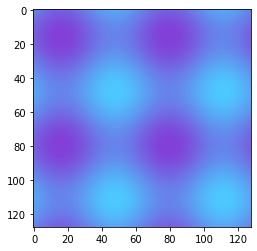

In [6]:
# Show the plot.
fig, ax = plt.subplots()
ax.imshow(im, cmap=cmap)
plt.show()